# **EDA for TikTok KOL/KOC Analysis**

## **IMPORT**

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from collections import Counter
from wordcloud import WordCloud, STOPWORDS
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

## **LOAD DATA**

In [3]:
df = pd.read_csv('/content/training_data.csv')

In [5]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [6]:
df.head()

,user_name,user_nfollower,user_total_likes,vid_id,vid_caption,vid_postTime,vid_scrapeTime,vid_duration,vid_nview,vid_nlike,...,music_authorName,music_originality,topic,vid_desc_clean,vid_hashtags_normalized,hashtag_count,vid_duration_sec,vid_existtime_hrs,post_hour,post_day
0,nguyenbinhh.220,5512.0,14700.0,7283120977221782786,Share cho cả nhà 1 địa chỉ tin cậy mà mình vẫn...,2023-09-27 03:09:04+07:00,2025-06-24 08:21:42+07:00,00:57,11300.0,52.0,...,Unknown,False,['health'],"Share 1 địa_chỉ tin_cậy ghé thăm , Huda_Skinla...","['bsihue', 'hudaskinlab']",2,57.0,15269.210556,3,Wednesday
1,nguyenbinhh.220,5512.0,14700.0,7283120977221782786,Share cho cả nhà 1 địa chỉ tin cậy mà mình vẫn...,2023-09-27 03:09:04+07:00,2025-06-25 04:23:28+07:00,00:57,11300.0,52.0,...,Unknown,False,['health'],"Share 1 địa_chỉ tin_cậy ghé thăm , Huda_Skinla...","['bsihue', 'hudaskinlab']",2,57.0,15289.240000,3,Wednesday
2,nguyenbinhh.220,5512.0,14700.0,7283120977221782786,Share cho cả nhà 1 địa chỉ tin cậy mà mình vẫn...,2023-09-27 03:09:04+07:00,2025-06-26 01:39:33+07:00,00:57,11400.0,52.0,...,Unknown,False,['health'],"Share 1 địa_chỉ tin_cậy ghé thăm , Huda_Skinla...","['bsihue', 'hudaskinlab']",2,57.0,15310.508056,3,Wednesday
3,nguyenbinhh.220,5512.0,14700.0,7283120977221782786,Share cho cả nhà 1 địa chỉ tin cậy mà mình vẫn...,2023-09-27 03:09:04+07:00,2025-06-27 02:20:55+07:00,00:57,11400.0,52.0,...,Unknown,False,['health'],"Share 1 địa_chỉ tin_cậy ghé thăm , Huda_Skinla...","['bsihue', 'hudaskinlab']",2,57.0,15335.197500,3,Wednesday
4,iamjayden94,1012.0,3691.0,7283353367487712520,GroupX Audition 2023 - Mùa 2,2023-09-27 18:10:52+07:00,2025-06-24 08:30:35+07:00,00:30,718.0,8.0,...,Afrian_Af26,False,['health'],GroupX Audition 2023 - Mùa 2,"['workoutmotivation', 'xuhuong2023', 'viraltik...",6,30.0,15254.328611,18,Wednesday


In [7]:
df.tail()

,user_name,user_nfollower,user_total_likes,vid_id,vid_caption,vid_postTime,vid_scrapeTime,vid_duration,vid_nview,vid_nlike,...,music_authorName,music_originality,topic,vid_desc_clean,vid_hashtags_normalized,hashtag_count,vid_duration_sec,vid_existtime_hrs,post_hour,post_day
29631,lampark.chuyenmacdo,756.0,25800.0,7520242828325244180,Phối đồ đi đám cưới nyc thế này dc nha,2025-06-27 03:02:58+07:00,2025-07-01 05:09:02+07:00,00:39,1194.0,28.0,...,HURRYKNG|Viết Hậu⚜️,False,['Fashion'],Phối_đồ đi đám_cưới nyc dc nha,"['chuyenmacdo', 'learnontiktok', 'phoidonam', ...",4,39.0,98.101111,3,Friday
29632,phun.anh,5200000.0,121100000.0,7520468352809143570,Dịu quá,2025-06-27 17:38:07+07:00,2025-06-28 07:37:09+07:00,00:00,55900.0,403.0,...,Phùn Anh,True,"['Beauty', 'Fashion']",Dịu,"['mfvelvetyclay', 'magefy', 'magefymakeup', 'k...",4,0.0,13.983889,17,Friday
29633,phun.anh,5200000.0,121100000.0,7520468352809143570,Dịu quá,2025-06-27 17:38:07+07:00,2025-06-29 12:27:56+07:00,00:00,128500.0,921.0,...,Phùn Anh,True,"['Beauty', 'Fashion']",Dịu,"['mfvelvetyclay', 'magefy', 'magefymakeup', 'k...",4,0.0,42.830278,17,Friday
29634,phun.anh,5200000.0,121100000.0,7520468352809143570,Dịu quá,2025-06-27 17:38:07+07:00,2025-06-29 19:05:28+07:00,00:00,134400.0,960.0,...,Phùn Anh,True,"['Beauty', 'Fashion']",Dịu,"['mfvelvetyclay', 'magefy', 'magefymakeup', 'k...",4,0.0,49.455833,17,Friday
29635,phun.anh,5200000.0,121200000.0,7520468352809143570,Dịu quá,2025-06-27 17:38:07+07:00,2025-07-01 09:50:10+07:00,00:00,187800.0,1425.0,...,Phùn Anh,True,"['Beauty', 'Fashion']",Dịu,"['mfvelvetyclay', 'magefy', 'magefymakeup', 'k...",4,0.0,88.200833,17,Friday


In [8]:
print("Number of Rows",df.shape[0])
print("Number of Columns",df.shape[1])

Number of Rows 29636
Number of Columns 28


In [9]:
print("Columns Names : ", df.columns)

Columns Names :  Index(['user_name', 'user_nfollower', 'user_total_likes', 'vid_id',
       'vid_caption', 'vid_postTime', 'vid_scrapeTime', 'vid_duration',
       'vid_nview', 'vid_nlike', 'vid_ncomment', 'vid_nshare', 'vid_nsave',
       'vid_hashtags', 'vid_url', 'music_id', 'music_title', 'music_nused',
       'music_authorName', 'music_originality', 'topic', 'vid_desc_clean',
       'vid_hashtags_normalized', 'hashtag_count', 'vid_duration_sec',
       'vid_existtime_hrs', 'post_hour', 'post_day'],
      dtype='object')


In [10]:
df.isnull().sum()

,0
user_name,0
user_nfollower,39
user_total_likes,39
vid_id,0
vid_caption,2397
vid_postTime,0
vid_scrapeTime,0
vid_duration,1
vid_nview,0
vid_nlike,0


In [11]:
num_duplicates = len(df[df.duplicated()])
print("Number of duplicated rows:", num_duplicates)

Number of duplicated rows: 0


In [12]:
df.describe()

,user_nfollower,user_total_likes,vid_id,vid_nview,vid_nlike,vid_ncomment,vid_nshare,vid_nsave,music_id,music_nused,hashtag_count,vid_duration_sec,vid_existtime_hrs,post_hour
count,2.959700e+04,2.959700e+04,2.963600e+04,2.963600e+04,2.963600e+04,29636.000000,29636.000000,29636.000000,2.955900e+04,2.786500e+04,29636.000000,28388.000000,29636.000000,29636.000000
mean,4.334606e+05,1.326340e+07,7.501424e+18,3.928682e+05,1.588044e+04,130.427622,633.093704,733.108179,7.399001e+18,4.508367e+05,4.383925,27.861033,1220.744942,9.732353
std,1.217695e+06,3.953969e+07,3.145674e+16,2.783918e+06,2.019407e+05,1149.973676,5237.641702,9531.598205,1.974665e+17,2.330735e+06,3.534475,43.741879,2025.028729,8.426494
min,9.400000e+01,8.080000e+02,7.283121e+18,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,1.617414e+17,1.000000e+00,0.000000,0.000000,7.061667,0.000000
25%,2.260000e+04,3.954000e+05,7.502427e+18,5.803750e+03,1.170000e+02,7.000000,2.000000,6.000000,7.370708e+18,1.000000e+00,2.000000,0.000000,228.916250,2.000000
50%,1.190000e+05,1.700000e+06,7.512511e+18,5.660000e+04,1.187000e+03,33.000000,15.000000,46.000000,7.486367e+18,1.878000e+03,4.000000,13.000000,501.843056,5.000000
75%,3.212000e+05,7.700000e+06,7.516889e+18,1.908000e+05,5.359750e+03,82.000000,170.000000,297.000000,7.510974e+18,5.440000e+04,6.000000,40.000000,1151.604861,18.000000
max,1.680000e+07,5.387000e+08,7.520468e+18,1.510000e+08,1.700000e+07,94500.000000,307600.000000,796100.000000,7.520468e+18,4.170000e+07,39.000000,599.000000,15335.197500,23.000000


In [24]:
print(df.dtypes)

user_name                                     object
user_nfollower                               float64
user_total_likes                             float64
vid_id                                         int64
vid_caption                                   object
vid_postTime               datetime64[ns, UTC+07:00]
vid_scrapeTime                                object
vid_duration                                  object
vid_nview                                    float64
vid_nlike                                    float64
vid_ncomment                                 float64
vid_nshare                                   float64
vid_nsave                                    float64
vid_hashtags                                  object
vid_url                                       object
music_id                                     float64
music_title                                   object
music_nused                                  float64
music_authorName                              

## **CLEAN NUMERIC COLUMNS**

In [14]:
def clean_number(val):
    if pd.isna(val): return 0
    val = str(val).lower().replace(',', '').strip()
    if 'k' in val: return float(val.replace('k', '')) * 1_000
    if 'm' in val: return float(val.replace('m', '')) * 1_000_000
    return pd.to_numeric(val, errors='coerce')

In [15]:
cols_to_clean = ['user_nfollower', 'user_total_likes', 'vid_nview', 'vid_nlike', 'vid_ncomment', 'vid_nshare', 'vid_nsave']
for col in cols_to_clean:
    df[col] = df[col].apply(clean_number)

## **TIME FEATURES**

In [16]:
df['vid_postTime'] = pd.to_datetime(df['vid_postTime'], errors='coerce')
df['post_hour'] = df['vid_postTime'].dt.hour
df['post_day'] = df['vid_postTime'].dt.dayofweek
df['is_weekend'] = df['post_day'].isin([5, 6])
holidays = pd.to_datetime(["2025-01-01", "2025-04-30", "2025-05-01", "2025-09-02"])
df['is_holiday'] = df['vid_postTime'].dt.date.isin(holidays.date)

## **BASIC FEATURES**

In [17]:
df['engagement_rate'] = (df['vid_nlike'] + df['vid_ncomment'] + df['vid_nshare'] + df['vid_nsave']) / df['vid_nview'].replace(0, np.nan)
df['caption_len'] = df['vid_caption'].fillna('').apply(len)
df['caption_len_group'] = pd.cut(df['caption_len'], bins=[0, 20, 50, 100, 200, df['caption_len'].max()],
                                 labels=['<20', '20-50', '50-100', '100-200', '>200'])

In [18]:
df['n_hashtags'] = df['vid_hashtags'].fillna('').astype(str).apply(lambda x: len(x.split(',')))
df['vid_hashtags_list'] = df['vid_hashtags'].fillna('').astype(str).str.lower().str.replace('#', '').str.split(',')

In [19]:
def duration_to_sec(d):
    if pd.isna(d): return np.nan
    parts = list(map(int, str(d).split(':')))
    if len(parts) == 1: return parts[0]
    elif len(parts) == 2: return parts[0]*60 + parts[1]
    elif len(parts) == 3: return parts[0]*3600 + parts[1]*60 + parts[2]
    return np.nan

In [20]:
df['vid_duration_sec'] = df['vid_duration'].apply(duration_to_sec)
df['duration_group'] = pd.cut(df['vid_duration_sec'], bins=[0, 30, 60, 90, 120, df['vid_duration_sec'].max()],
                              labels=['<30s', '30–60s', '60–90s', '90–120s', '>120s'])

In [21]:
# Time slot grouping
def map_time_slot(hour):
    if 6 <= hour < 11: return 'Morning'
    elif 11 <= hour < 14: return 'Noon'
    elif 14 <= hour < 17: return 'Afternoon'
    elif 17 <= hour < 21: return 'Evening'
    return 'Late Night'

df['time_slot'] = df['post_hour'].apply(map_time_slot)

In [22]:
# Music
df['music_originality'] = df['music_originality'].fillna('No Data')
df['music_nused'] = pd.to_numeric(df['music_nused'].replace('No Data', 0), errors='coerce')

In [23]:
# Sub interaction metrics
df['like_rate'] = df['vid_nlike'] / df['vid_nview'].replace(0, 1)
df['comment_rate'] = df['vid_ncomment'] / df['vid_nview'].replace(0, 1)
df['share_rate'] = df['vid_nshare'] / df['vid_nview'].replace(0, 1)
df['save_rate'] = df['vid_nsave'] / df['vid_nview'].replace(0, 1)

## **Top 10 Hashtags**

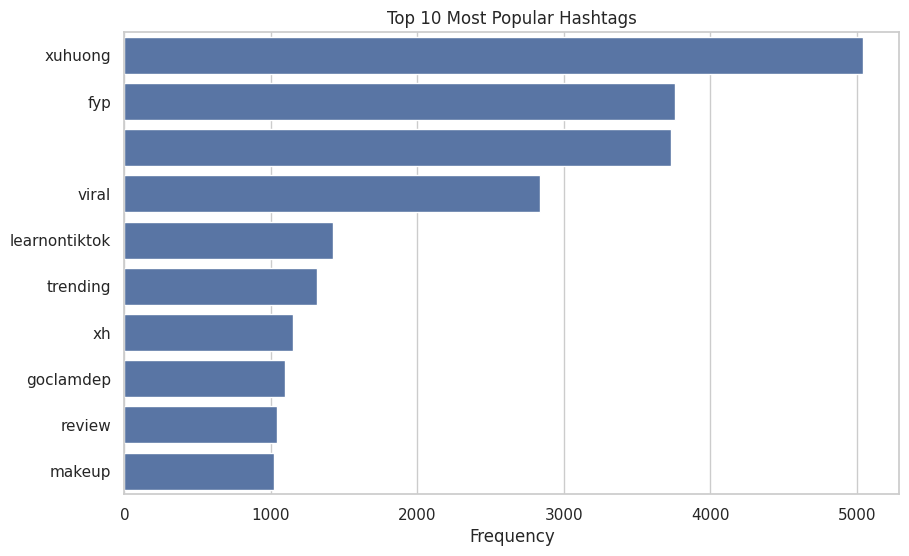

In [25]:
top_hashtags = Counter(df['vid_hashtags_list'].explode().dropna().str.strip()).most_common(10)
sns.barplot(x=[x[1] for x in top_hashtags], y=[x[0] for x in top_hashtags])
plt.title("Top 10 Most Popular Hashtags")
plt.xlabel("Frequency")
plt.show()

## **Engagement Rate by Video Duration**



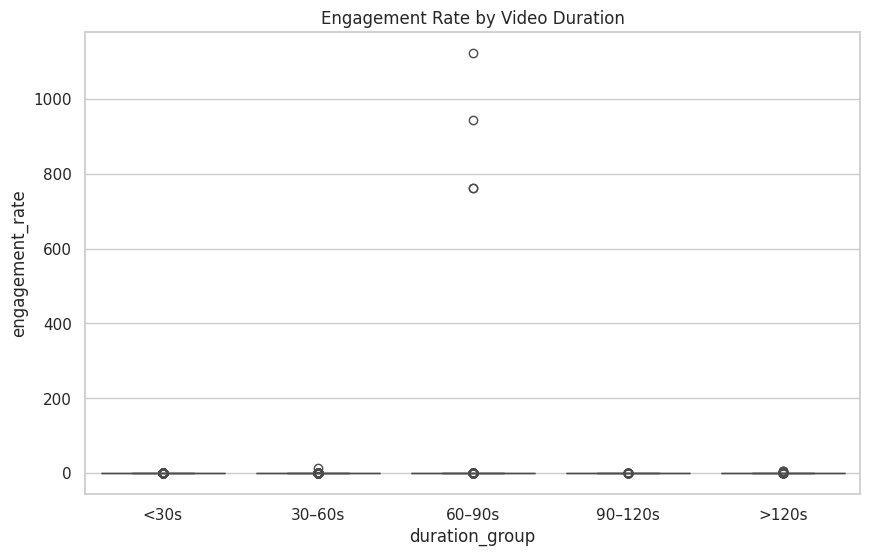

In [26]:
sns.boxplot(data=df, x='duration_group', y='engagement_rate')
plt.title("Engagement Rate by Video Duration")
plt.show()

## **Engagement Rate by Caption Length**

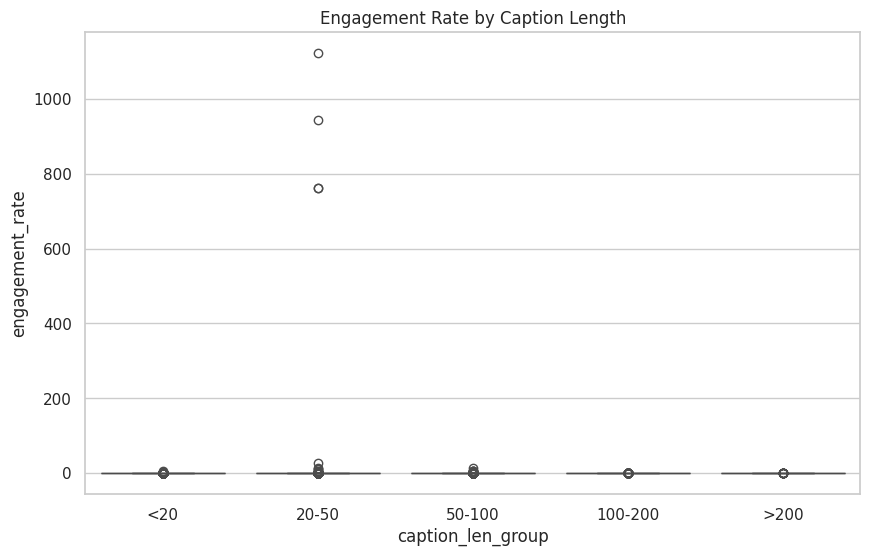

In [27]:
sns.boxplot(data=df, x='caption_len_group', y='engagement_rate')
plt.title("Engagement Rate by Caption Length")
plt.show()

## **Weekday vs Weekend**

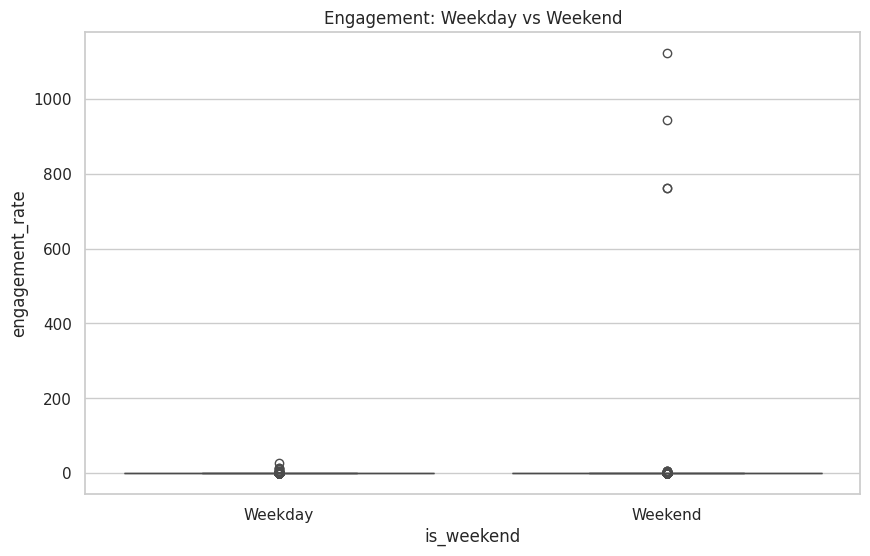

In [28]:
sns.boxplot(data=df, x='is_weekend', y='engagement_rate')
plt.xticks([0, 1], ['Weekday', 'Weekend'])
plt.title("Engagement: Weekday vs Weekend")
plt.show()

## **Holiday vs Non-Holiday**

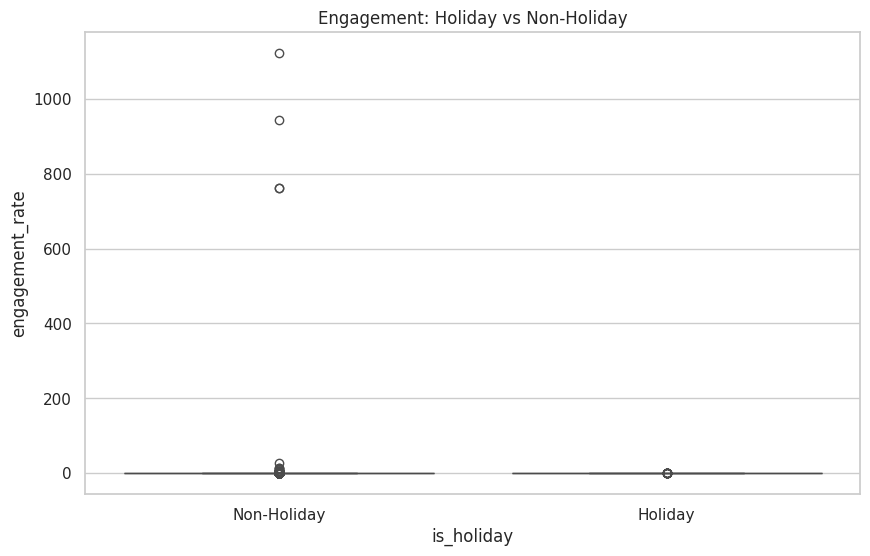

In [29]:
sns.boxplot(data=df, x='is_holiday', y='engagement_rate')
plt.xticks([0, 1], ['Non-Holiday', 'Holiday'])
plt.title("Engagement: Holiday vs Non-Holiday")
plt.show()

## **Time Slot Engagement**

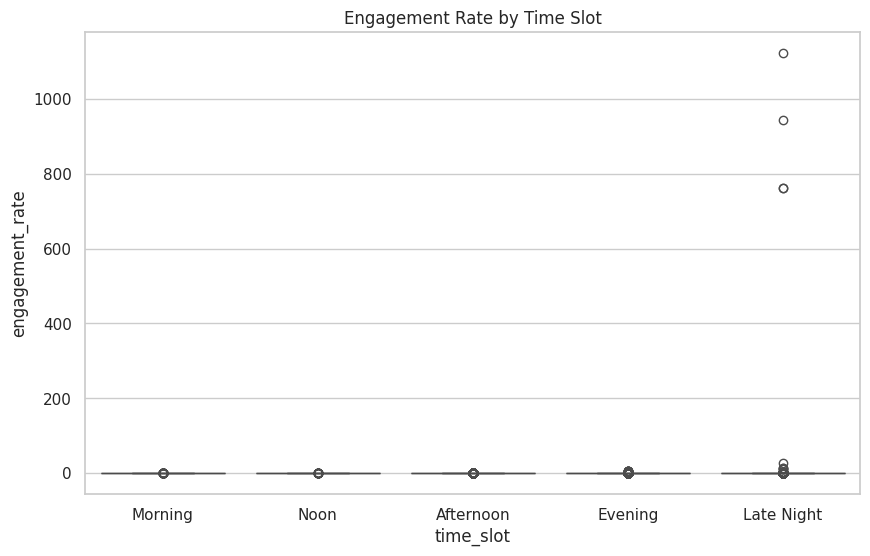

In [30]:
sns.boxplot(data=df, x='time_slot', y='engagement_rate', order=['Morning', 'Noon', 'Afternoon', 'Evening', 'Late Night'])
plt.title("Engagement Rate by Time Slot")
plt.show()

## **Music Originality**

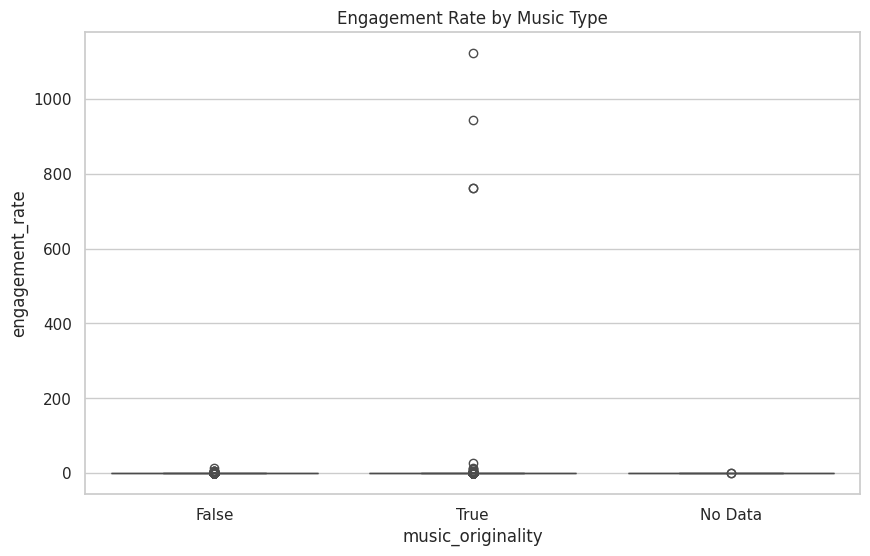

In [31]:
sns.boxplot(data=df, x='music_originality', y='engagement_rate')
plt.title("Engagement Rate by Music Type")
plt.show()

## **Number of Hashtags**

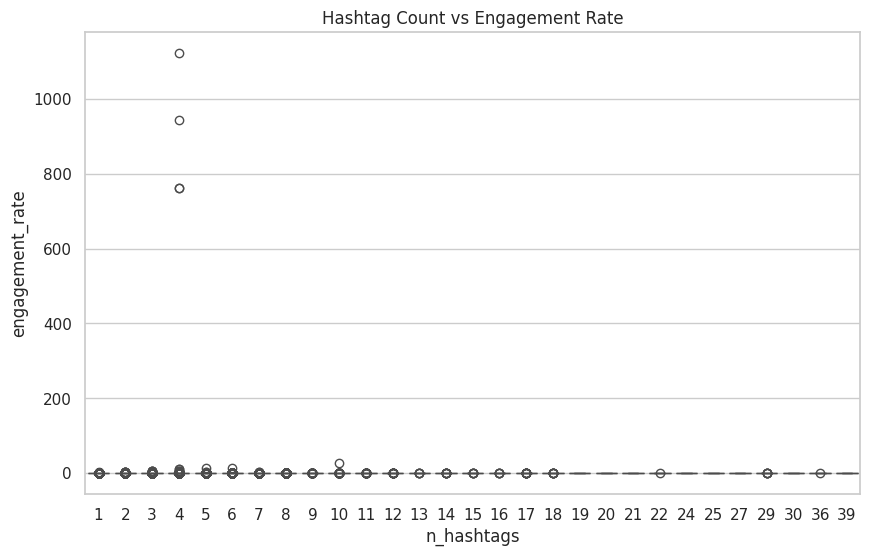

In [32]:
sns.boxplot(data=df, x='n_hashtags', y='engagement_rate')
plt.title("Hashtag Count vs Engagement Rate")
plt.show()

## **Day of Week**

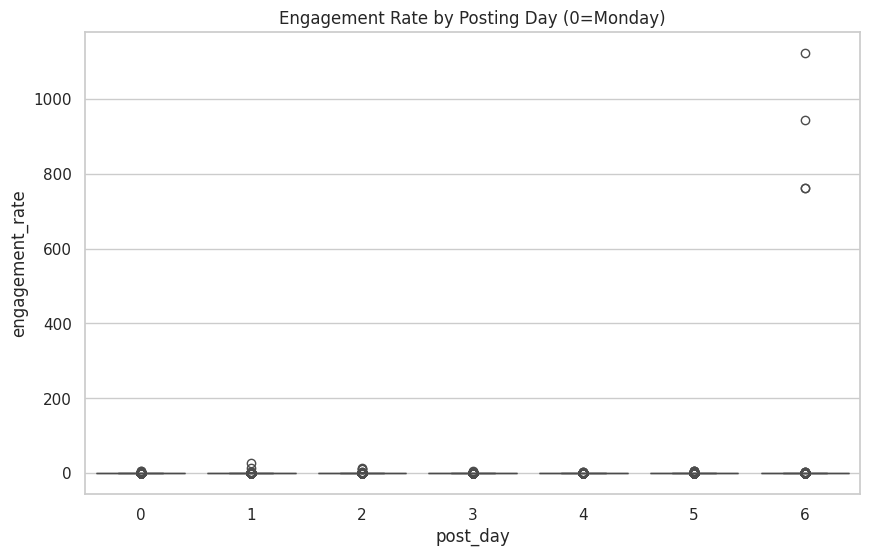

In [33]:
sns.boxplot(data=df, x='post_day', y='engagement_rate')
plt.title("Engagement Rate by Posting Day (0=Monday)")
plt.show()

## **Distribution of Engagement Rate**

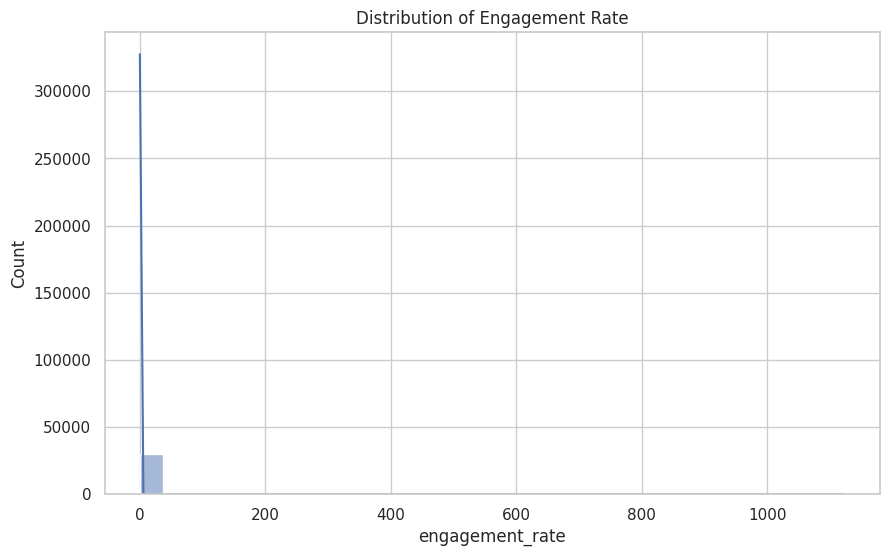

In [34]:
sns.histplot(df['engagement_rate'].dropna(), bins=30, kde=True)
plt.title("Distribution of Engagement Rate")
plt.show()

## **Multivariate Analysis**

In [37]:
import statsmodels.api as sm

# Tạo biến độc lập
features = ['caption_len', 'n_hashtags', 'vid_duration_sec', 'user_nfollower']
X = df[features].copy() # Create a copy to avoid SettingWithCopyWarning
X = sm.add_constant(X)  # thêm hệ số chệch
y = df['engagement_rate'].copy() # Create a copy

# Drop rows with NaN or inf in X or y
data = pd.concat([X, y], axis=1).dropna()
X = data[X.columns]
y = data[y.name]


model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        engagement_rate   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.518
Date:                Wed, 16 Jul 2025   Prob (F-statistic):              0.194
Time:                        15:35:27   Log-Likelihood:            -1.1191e+05
No. Observations:               29633   AIC:                         2.238e+05
Df Residuals:                   29628   BIC:                         2.239e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2139      0.125  

## **Phân khúc KOL/KOC theo mức follower**

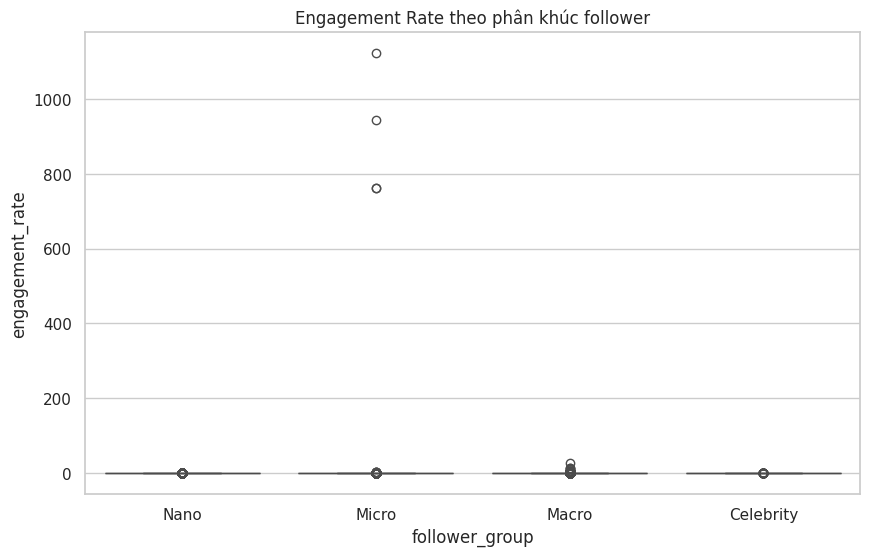

In [38]:
def categorize_follower(f):
    if f < 10000:
        return 'Nano'
    elif f < 100000:
        return 'Micro'
    elif f < 1000000:
        return 'Macro'
    else:
        return 'Celebrity'

df['follower_group'] = df['user_nfollower'].apply(categorize_follower)
sns.boxplot(x='follower_group', y='engagement_rate', data=df, order=['Nano', 'Micro', 'Macro', 'Celebrity'])
plt.title("Engagement Rate theo phân khúc follower")
plt.show()

## **Phân tích CTA trong caption (kêu gọi hành động)**

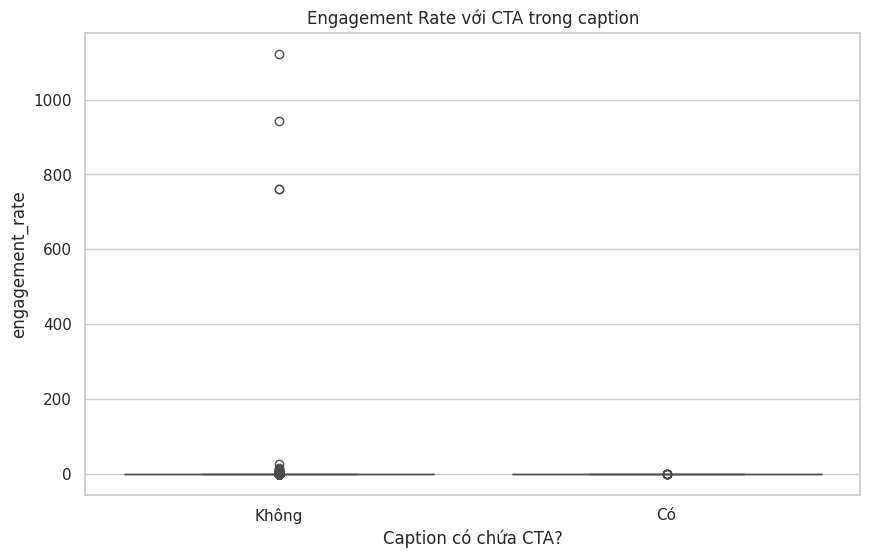

In [39]:
cta_keywords = ['comment', 'xem thêm', 'link bio', 'thử ngay', 'inbox', 'ib', 'mua ngay', 'follow']

df['has_cta'] = df['vid_caption'].fillna('').str.lower().apply(lambda x: any(k in x for k in cta_keywords))
sns.boxplot(x='has_cta', y='engagement_rate', data=df)
plt.title("Engagement Rate với CTA trong caption")
plt.xlabel("Caption có chứa CTA?")
plt.xticks([0, 1], ['Không', 'Có'])
plt.show()

## **Phân tích Caption**

In [40]:
pip install wordcloud

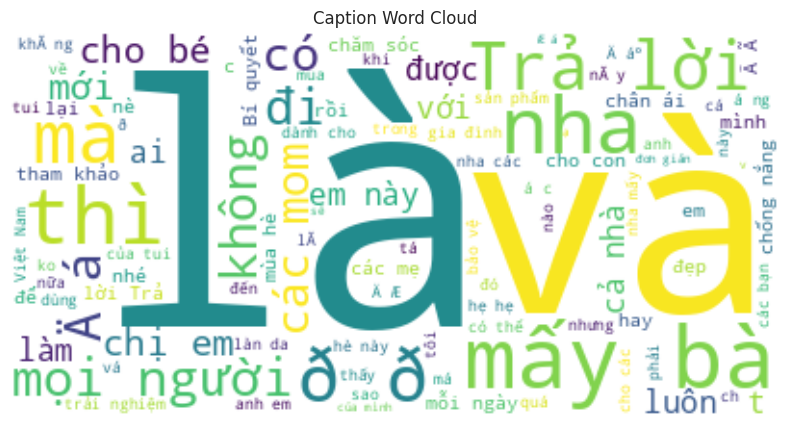

In [44]:
from wordcloud import WordCloud, STOPWORDS
# WordCloud
text = " ".join(df['vid_caption'].dropna().astype(str))
wc = WordCloud(stopwords=STOPWORDS, background_color='white', max_words=100).generate(text)
plt.figure(figsize=(12,5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("Caption Word Cloud")
plt.show()

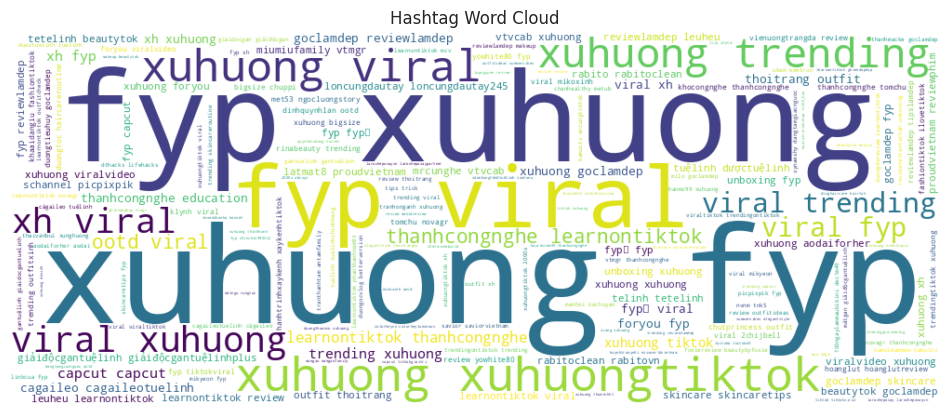

In [43]:
# WordCloud Hashtags
df['vid_hashtags_str'] = df['vid_hashtags'].fillna('').astype(str)
all_hashtags = " ".join(df['vid_hashtags_str'])
wc = WordCloud(background_color='white', width=1000, height=400).generate(all_hashtags)
plt.figure(figsize=(12,5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("Hashtag Word Cloud")
plt.show()


## **Biểu đồ phân phối (Boxplot + Histogram) cho các biến định lượng chính**

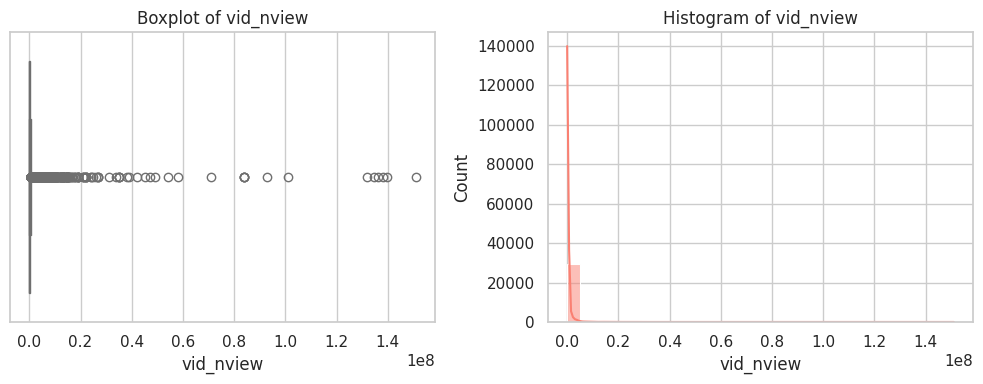

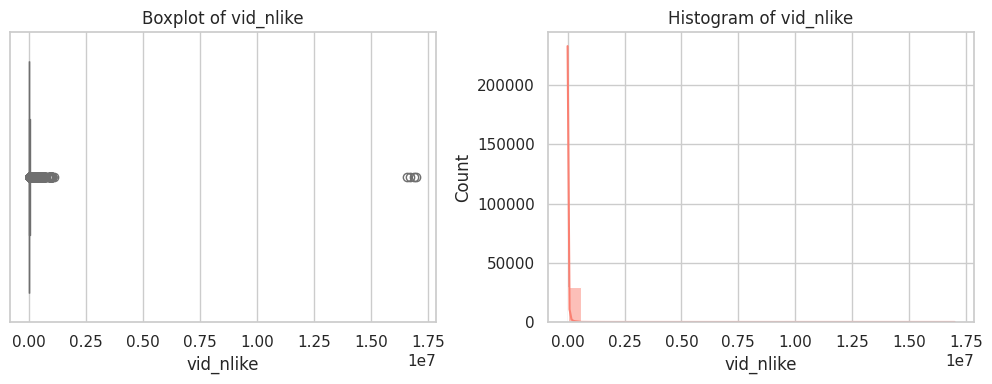

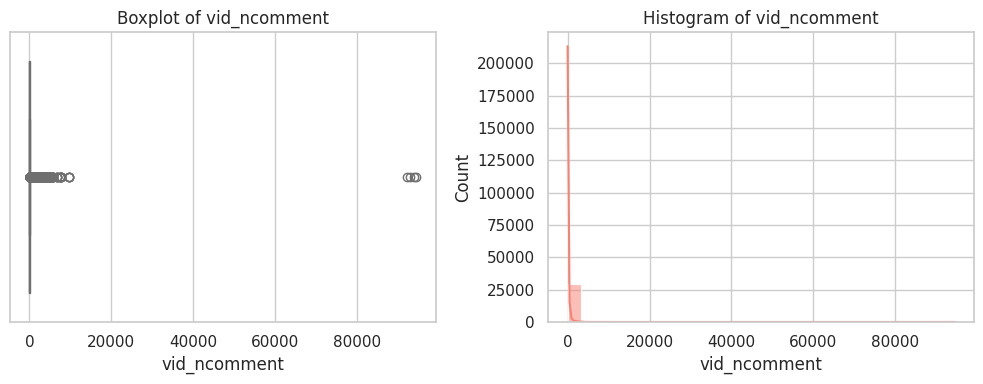

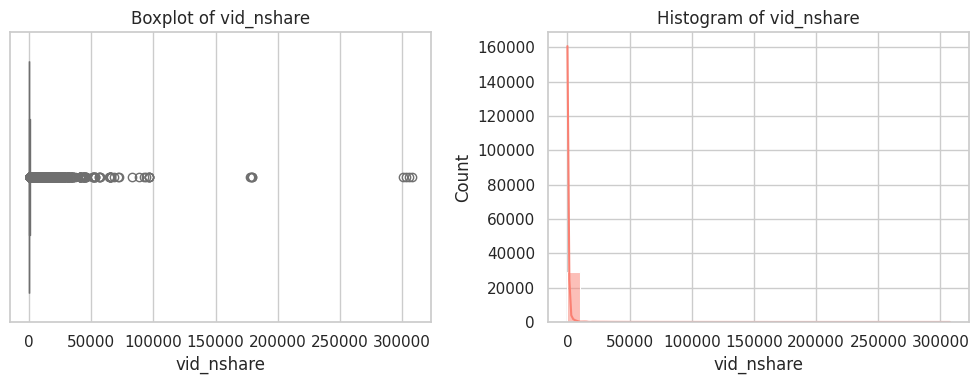

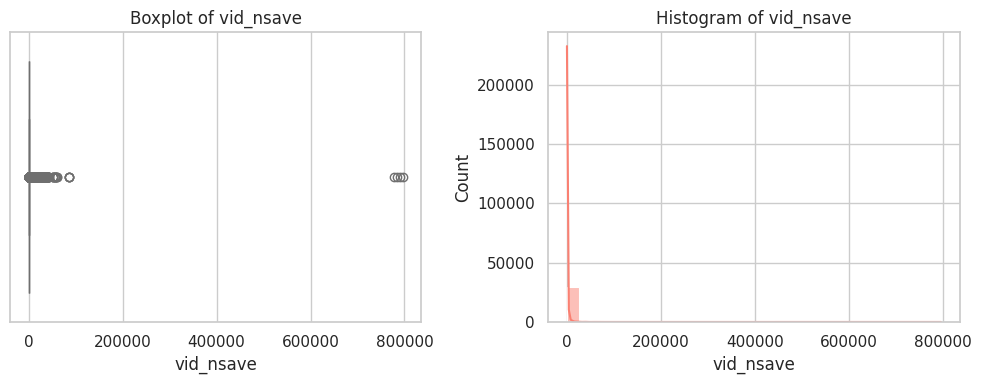

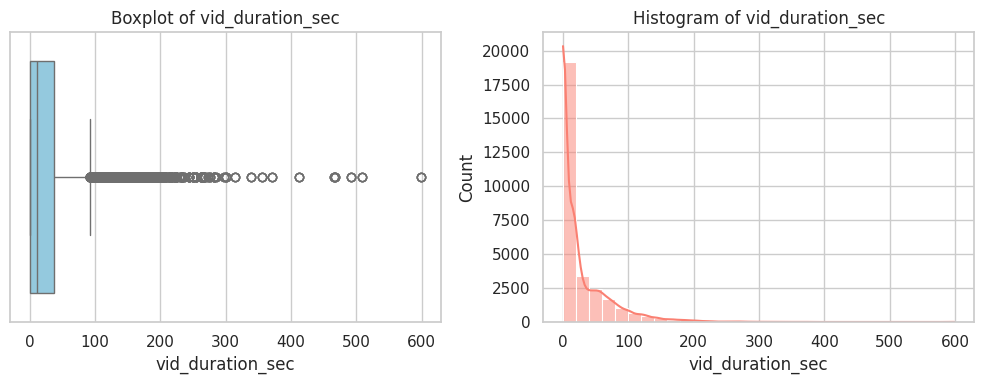

In [47]:
# Biểu đồ histogram + boxplot cho từng biến định lượng
num_cols = ['vid_nview', 'vid_nlike', 'vid_ncomment', 'vid_nshare', 'vid_nsave', 'vid_duration_sec']
for col in num_cols:
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    sns.boxplot(x=df[col].dropna(), color='skyblue')
    plt.title(f'Boxplot of {col}')

    plt.subplot(1, 2, 2)
    sns.histplot(df[col].dropna(), bins=30, color='salmon', kde=True)
    plt.title(f'Histogram of {col}')
    plt.tight_layout()
    plt.show()

## **Phân tích vid_existtime_hrs (tuổi đời video) vs Engagement**

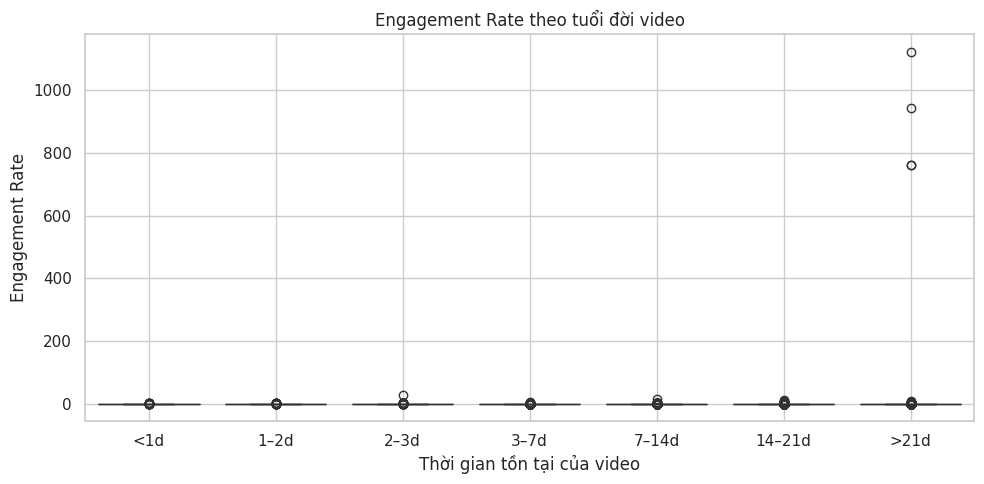

In [48]:
df['existtime_group'] = pd.cut(df['vid_existtime_hrs'], bins=[0, 24, 48, 72, 168, 336, 504, df['vid_existtime_hrs'].max()],
                                labels=['<1d', '1–2d', '2–3d', '3–7d', '7–14d', '14–21d', '>21d'])

plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='existtime_group', y='engagement_rate', palette='viridis')
plt.title("Engagement Rate theo tuổi đời video")
plt.xlabel("Thời gian tồn tại của video")
plt.ylabel("Engagement Rate")
plt.grid(True)
plt.tight_layout()
plt.show()

## **Heatmap tương quan mở rộng**

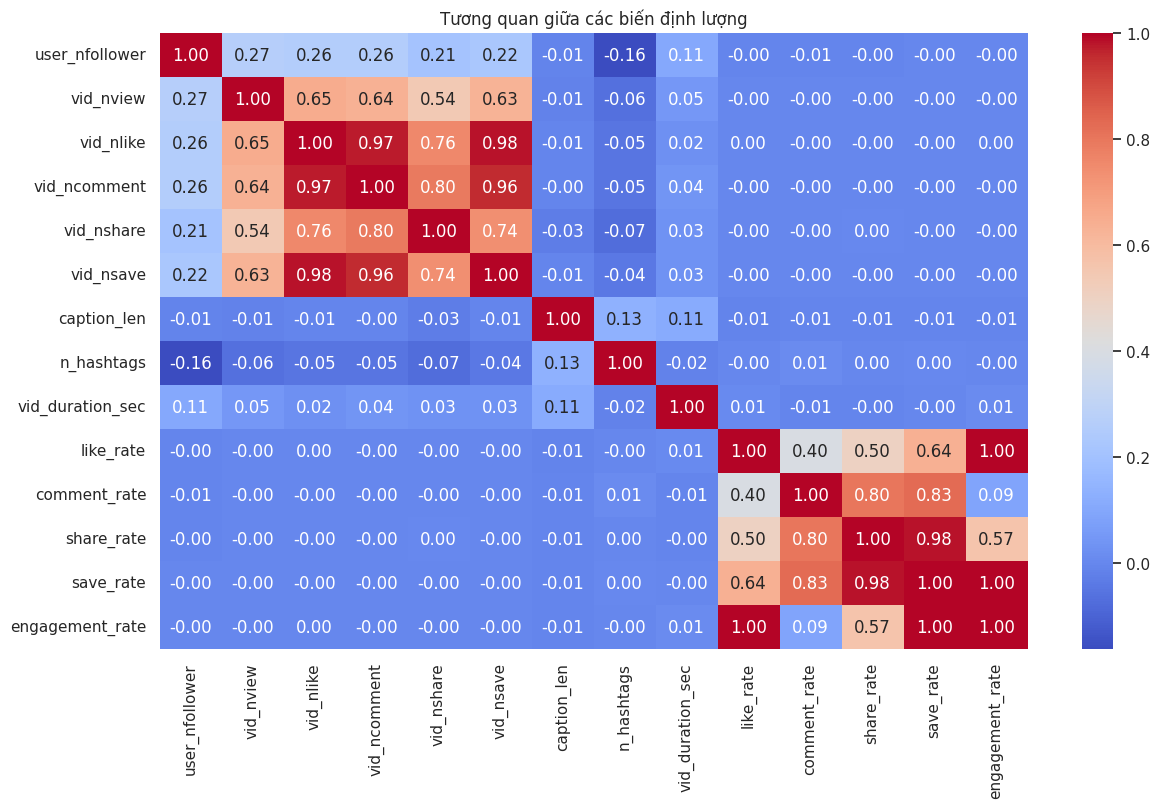

In [49]:
corr_cols = ['user_nfollower', 'vid_nview', 'vid_nlike', 'vid_ncomment', 'vid_nshare',
             'vid_nsave', 'caption_len', 'n_hashtags', 'vid_duration_sec',
             'like_rate', 'comment_rate', 'share_rate', 'save_rate', 'engagement_rate']

plt.figure(figsize=(14, 8))
sns.heatmap(df[corr_cols].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Tương quan giữa các biến định lượng")
plt.show()

## **Top KOL theo phân nhóm (micro/macro)**

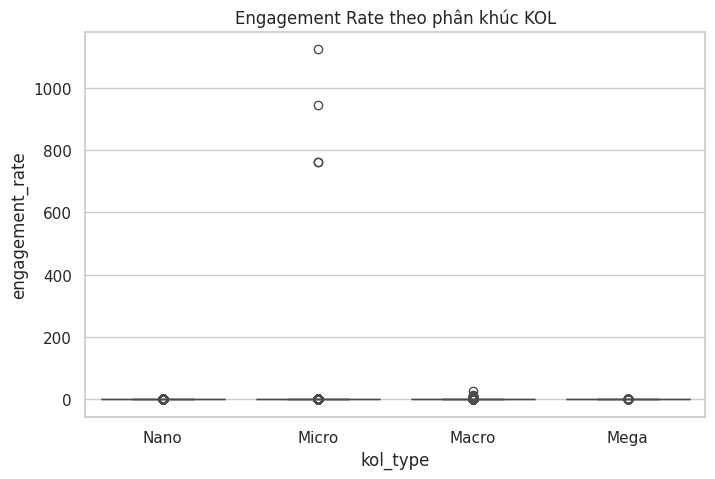

In [50]:
df['kol_type'] = pd.cut(df['user_nfollower'],
                        bins=[0, 10000, 100000, 1000000, df['user_nfollower'].max()],
                        labels=['Nano', 'Micro', 'Macro', 'Mega'])

plt.figure(figsize=(8, 5))
sns.boxplot(x='kol_type', y='engagement_rate', data=df)
plt.title("Engagement Rate theo phân khúc KOL")
plt.show()

## **Phân tích tăng trưởng engagement theo thời gian (Rolling Mean + Growth Label)**

In [51]:
df = df.sort_values(['user_name', 'vid_postTime'])
df['rolling_engagement'] = df.groupby('user_name')['engagement_rate'].transform(lambda x: x.rolling(3, 1).mean())
df['growth_rate'] = df.groupby('user_name')['rolling_engagement'].diff()

def classify_growth(x):
    if pd.isna(x): return 'Stable'
    elif x > 0.01: return 'Increase'
    elif x < -0.01: return 'Decrease'
    else: return 'Stable'

df['growth_label'] = df['growth_rate'].apply(classify_growth)


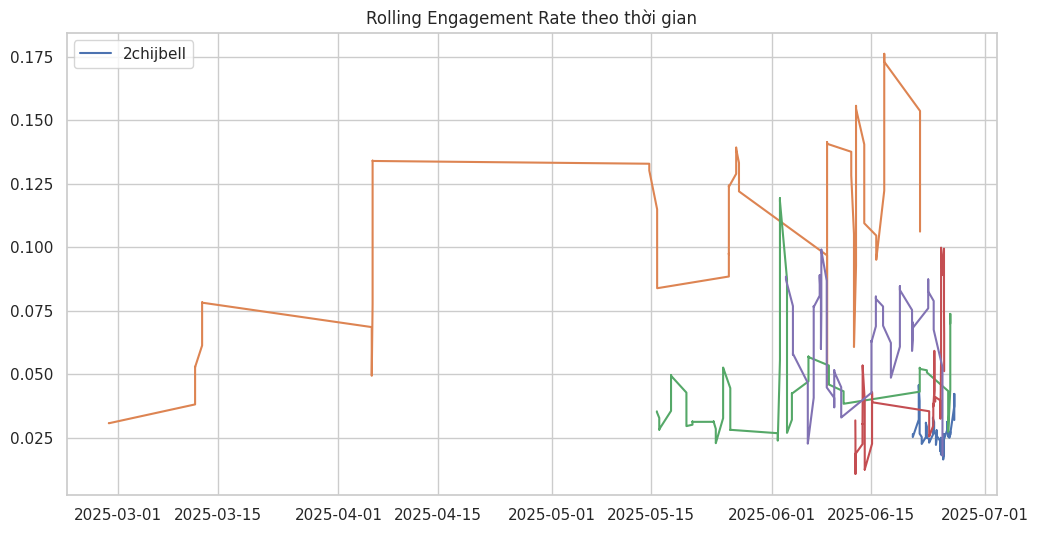

In [52]:
top_users = df['user_name'].dropna().unique()[:5]
plt.figure(figsize=(12,6))
for user in top_users:
    sub = df[df['user_name'] == user]
    plt.plot(sub['vid_postTime'], sub['rolling_engagement'], label=user)
plt.legend()
plt.title("Rolling Engagement Rate theo thời gian")
plt.show()


## **Gợi ý KOL tiềm năng cho booking**

In [53]:
# Lọc user có >= 5 video
user_counts = df['user_name'].value_counts()
eligible_users = user_counts[user_counts >= 5].index

# Tính độ tăng trưởng trung bình và độ lệch chuẩn
user_growth = df[df['user_name'].isin(eligible_users)].groupby('user_name')['growth_rate'].agg(['mean', 'std']).reset_index()
user_growth.columns = ['user_name', 'avg_growth', 'std_growth']

# Merge với follower
user_followers = df.groupby('user_name')['user_nfollower'].first().reset_index()
suggested = user_growth.merge(user_followers, on='user_name')

# Lọc KOL phù hợp
final_kol = suggested[
    (suggested['avg_growth'] > 0.001) &
    (suggested['std_growth'] < 0.02) &
    (suggested['user_nfollower'] >= 10_000) &
    (suggested['user_nfollower'] <= 100_000)
].sort_values(by='avg_growth', ascending=False)

print("🎯 Gợi ý Top 10 KOL tiềm năng:")
print(final_kol.head(10))


🎯 Gợi ý Top 10 KOL tiềm năng:
       user_name  avg_growth  std_growth  user_nfollower
197  mieriviu247    0.001489    0.013253         18100.0
98    hienpunnie    0.001348    0.013715         22700.0
361    xunanh_kk    0.001134    0.013585         15300.0
